<a href="https://colab.research.google.com/github/revathy12345/CIPHERBYTE-TECHNOLOGIES-INTERNSHIP/blob/main/PROBLEM_STATEMENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**
We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Let’s get started!

## **Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# convert text into feature vector or numeric values
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt
import seaborn as sns

## **Data Collection & Pre- Processing**

In [ ]:
#loading the data from csv file to a pandas Dataframe
email_data=pd.read_csv('/content/Spam Email Detection - spam.csv')

In [ ]:
print(email_data)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will ?_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [ ]:
email_data.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
#remove the null values colums
#creating a new dataframe
mail_data = email_data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [ ]:
#printing the first 5 rows of the dataframe
mail_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##ham -> non spam mail
##spam -> spam mail

In [ ]:
#checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

In [ ]:
#rename the columns
mail_data=mail_data.rename(columns={
    'v1':'Category',
    'v2': 'Message'
})

# **Label Encoding**
Label encoding is a process of converting categorical or textual data into numerical labels. In machine learning and data analysis, many algorithms require numerical inputs, and label encoding provides a way to represent categorical data in a format that can be easily understood by these algorithms.

In [ ]:
#label spam mail 0; ham mail as 1;

mail_data.loc[mail_data['Category']== 'spam','Category',]=0
mail_data.loc[mail_data['Category']== 'ham','Category',]=1


spam - 0

ham - 1

In [ ]:
mail_data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


# **Data Cleaning**

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Function to clean the text data
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)

    # Convert text to lower case
    text = text.lower()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Apply the cleaning function to the messages
mail_data['Message'] = mail_data['Message'].apply(clean_text)

# Show the first 5 rows of the cleaned data
print(mail_data.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  Category                                            Message
0        1  go jurong point crazy available bugis n great ...
1        1                            ok lar joking wif u oni
2        0  free entry wkly comp win fa cup final tkts st ...
3        1                u dun say early hor u c already say
4        1             nah think goes usf lives around though


# **Data Exploration**

Category
1    4825
0     747
Name: count, dtype: int64


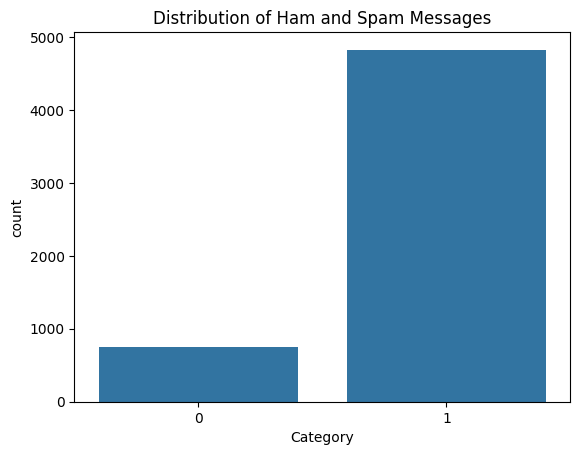

In [ ]:
# Check the distribution of categories
print(mail_data['Category'].value_counts())

# Plot the distribution
sns.countplot(x='Category', data=mail_data)
plt.title('Distribution of Ham and Spam Messages')
plt.show()


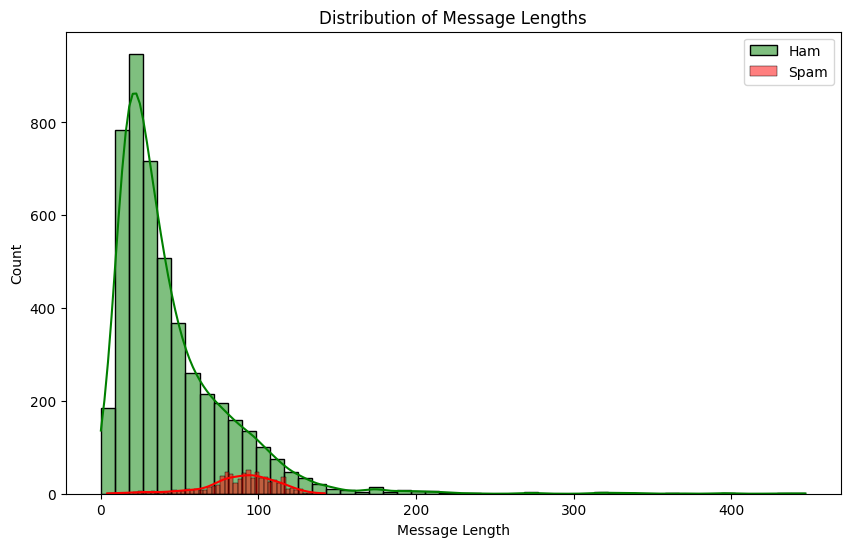

In [ ]:

# Check the length of messages
mail_data['Message Length'] = mail_data['Message'].apply(len)

# Plot the distribution of message lengths
plt.figure(figsize=(10, 6))
sns.histplot(mail_data[mail_data['Category'] == 1]['Message Length'], bins=50, label='Ham', color='green', kde=True)
sns.histplot(mail_data[mail_data['Category'] == 0]['Message Length'], bins=50, label='Spam', color='red', kde=True)
plt.title('Distribution of Message Lengths')
plt.legend()
plt.show()




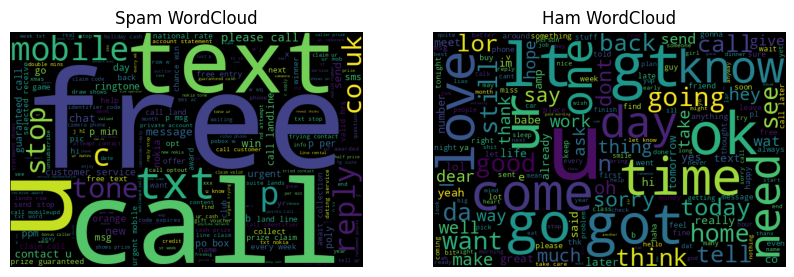

In [ ]:
# Most frequent words in spam and ham messages
from wordcloud import WordCloud

spam_words = ' '.join(list(mail_data[mail_data['Category'] == 0]['Message']))
ham_words = ' '.join(list(mail_data[mail_data['Category'] == 1]['Message']))

spam_wc = WordCloud(width=600, height=400).generate(spam_words)
ham_wc = WordCloud(width=600, height=400).generate(ham_words)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(spam_wc)
plt.title('Spam WordCloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wc)
plt.title('Ham WordCloud')
plt.axis('off')

plt.show()

In [ ]:
#separating the data as texts and label

X = mail_data['Message']

Y= mail_data['Category']

In [ ]:
print(X)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    nd time tried contact u u pound prize claim ea...
5568                          _ b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


# **Splitting the data into training data & test data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)


In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


## **Feature Extraction**
Feature Extraction helps to convert your text data into numerical values. If you feed all these strings to your logistic regression model it doesn't understand anything so we need to convert this all this text data into meaningful numerical values

In [ ]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
Y_train

,Category
3075,1
1787,1
1614,1
4304,1
3266,1
...,...
789,1
968,1
1667,1
3321,1


In [ ]:
Y_test

,Category
2632,1
454,0
983,1
1282,1
4610,1
...,...
4827,1
5291,1
3325,1
3561,1


In [ ]:
print(X_train)

3075    mum hope great day hoping text meets well full...
1787                                  yes sura sun tv lol
1614                sef dey laugh meanwhile darling anjie
4304                                  yo come carlos soon
3266                               ok come n pick u engin
                              ...                        
789                            gud mrng dear hav nice day
968                             willing go aptitude class
1667         dad gonna call gets work ask crazy questions
3321    ok darlin supose ok worry much film stuff mate...
1688                           nan sonathaya soladha boss
Name: Message, Length: 4457, dtype: object


In [ ]:
print(X_train_features)

  (0, 13)	0.33407751430625204
  (0, 3176)	0.25015007469043343
  (0, 3478)	0.40381552027163425
  (0, 5757)	0.20991071296574973
  (0, 2596)	0.33407751430625204
  (0, 1354)	0.3951114957013364
  (0, 2354)	0.4567158019658437
  (0, 2590)	0.22629685193718738
  (0, 3700)	0.3019390736140491
  (1, 3257)	0.380431198316959
  (1, 6023)	0.4306015894277422
  (1, 5577)	0.4769136859540388
  (1, 5602)	0.5652509076654626
  (1, 6587)	0.35056971070320353
  (2, 204)	0.4917598465723273
  (2, 1341)	0.42972812260098503
  (2, 3110)	0.40088501350982736
  (2, 1457)	0.413484525934624
  (2, 4991)	0.4917598465723273
  (3, 5303)	0.49047658200084215
  (3, 839)	0.5928182850633463
  (3, 1080)	0.37043972233822203
  (3, 6598)	0.5203591216816568
  (4, 1755)	0.7420609557223887
  (4, 4217)	0.45085969930136643
  :	:
  (4452, 2385)	0.40548690840553103
  (4452, 1354)	0.3062607941342352
  (4453, 271)	0.6760129013031282
  (4453, 6410)	0.5787739591782677
  (4453, 1004)	0.45610005640082985
  (4454, 2248)	0.42618909997886
  (4454, 1

## **Training the Model**

## **Logistic Regression**

In [ ]:
model = LogisticRegression()

In [ ]:
#training the Logistic Regression model with the training data
model.fit(X_train_features,Y_train)

LogisticRegression()

## **Evaluating the trained model**

In [ ]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)


In [ ]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9681400044873233


In [ ]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)


In [ ]:

print('Accuracy on test data : ', accuracy_on_test_data)


Accuracy on test data :  0.9641255605381166


## **Building a Predictive System**

In [ ]:
input_mail1 = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
input_mail2= ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail1)

# making prediction

prediction = model.predict(input_data_features)

if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

input_data_features = feature_extraction.transform(input_mail2)

# making prediction

prediction = model.predict(input_data_features)

if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

Ham mail
Spam mail


# **Experimenting with Different Models**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define a function to train and evaluate models
def train_and_evaluate(model, X_train_features, X_test_features, Y_train, Y_test):
    # Train the model
    model.fit(X_train_features, Y_train)

    # Predictions
    train_predictions = model.predict(X_train_features)
    test_predictions = model.predict(X_test_features)

    # Evaluation
    train_accuracy = accuracy_score(Y_train, train_predictions)
    test_accuracy = accuracy_score(Y_test, test_predictions)

    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("\nClassification Report:\n", classification_report(Y_test, test_predictions))
    print("\nConfusion Matrix:\n", confusion_matrix(Y_test, test_predictions))
    print("\n" + "="*60 + "\n")

# Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    train_and_evaluate(model, X_train_features, X_test_features, Y_train, Y_test)


Evaluating Logistic Regression...
Training Accuracy: 0.9681
Test Accuracy: 0.9641

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.85       155
           1       0.96      1.00      0.98       960

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.96      0.96      1115


Confusion Matrix:
 [[116  39]
 [  1 959]]


Evaluating Naive Bayes...
Training Accuracy: 0.9812
Test Accuracy: 0.9740

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.90       155
           1       0.97      1.00      0.99       960

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115


Confusion Matrix:
 [[126  29]
 [  0 960]]


Evaluating Support Vector Machine...
Training Accu

# **Using SMOTE to Oversample the Minority Class**

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Before SMOTE
print('Original dataset shape:', Counter(Y_train))

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train_features, Y_train)

# After SMOTE
print('Resampled dataset shape:', Counter(Y_train_smote))

# Re-train the model using the oversampled data
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, Y_train_smote)

# Evaluate the model on the test data
prediction_test_smote = model_smote.predict(X_test_features)
accuracy_test_smote = accuracy_score(Y_test, prediction_test_smote)

print('Accuracy on test data after SMOTE:', accuracy_test_smote)
print("\nClassification Report:\n", classification_report(Y_test, prediction_test_smote))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, prediction_test_smote))


Original dataset shape: Counter({1: 3865, 0: 592})
Resampled dataset shape: Counter({1: 3865, 0: 3865})
Accuracy on test data after SMOTE: 0.9775784753363229

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       155
           1       0.98      0.99      0.99       960

    accuracy                           0.98      1115
   macro avg       0.96      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
 [[138  17]
 [  8 952]]
